# Yoga Pose Classification


<h2> In this Notebook CNN model is used to classify different YOGA poses.

In [ ]:
# installing kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#copying kappgle API
cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


In [ ]:
#checking for the datasets
!kaggle datasets list -s Yoga-Pose-Classification

ref                                                  title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------  ------  -------------------  -------------  ---------  ---------------  
shrutisaxena/yoga-pose-image-classification-dataset  Yoga Pose Image classification dataset  1004MB  2021-04-03 14:37:48           1939         77  0.875            
elysian01/yoga-pose-classification                   Yoga Pose Classification                 528MB  2021-04-10 21:47:18            211          4  0.6875           
ujjwalchowdhury/yoga-pose-classification             Yoga Pose Classification                  15MB  2022-06-05 14:46:16             65         26  0.875            
lakshmanarajak/yoga-dataset                          Yoga Pose Dataset                        187MB  2022-03-02 14:50:21             48          0  0.75             
vidy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


dataset: https://www.kaggle.com/datasets/shrutisaxena/yoga-pose-image-classification-dataset

In [ ]:
#downloading the dataset
!kaggle datasets download shrutisaxena/yoga-pose-image-classification-dataset

 99% 996M/0.98G [00:12<00:00, 95.6MB/s]
100% 0.98G/0.98G [00:12<00:00, 84.1MB/s]


In [ ]:
#unzipping the dataset
!unzip /content/drive/MyDrive/yoga-pose-image-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/bharadvajasana i/11-1.png  
  inflating: dataset/bharadvajasana i/14-0.png  
  inflating: dataset/bharadvajasana i/15-0.png  
  inflating: dataset/bharadvajasana i/18-0.png  
  inflating: dataset/bharadvajasana i/18-1.png  
  inflating: dataset/bharadvajasana i/19-0.png  
  inflating: dataset/bharadvajasana i/2-0.png  
  inflating: dataset/bharadvajasana i/20-0.png  
  inflating: dataset/bharadvajasana i/21-0.png  
  inflating: dataset/bharadvajasana i/22-0.png  
  inflating: dataset/bharadvajasana i/23-0.png  
  inflating: dataset/bharadvajasana i/24-0.png  
  inflating: dataset/bharadvajasana i/26-0.png  
  inflating: dataset/bharadvajasana i/28-0.png  
  inflating: dataset/bharadvajasana i/29-0.png  
  inflating: dataset/bharadvajasana i/3-0.png  
  inflating: dataset/bharadvajasana i/30-0.png  
  inflating: dataset/bharadvajasana i/31-0.png  
  inflating: dataset/bharadvajasana i/32-0.png  
  inflating: dataset

In [ ]:
import cv2
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pylab as plt

from tqdm.notebook import tqdm
from glob import glob
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage import transform

import tensorflow as tf
from tensorflow import keras

import keras.backend as K
from keras.utils.np_utils import to_categorical

%matplotlib inline

In [ ]:
labels=[]  #to store all the labels
path='/content/dataset/'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)

labels

['adho mukha svanasana',
 'matsyasana',
 'parighasana',
 'anantasana',
 'uttanasana',
 'padangusthasana',
 'supta padangusthasana',
 'salamba bhujangasana',
 'agnistambhasana',
 'padmasana',
 'adho mukha vriksasana',
 'pincha mayurasana',
 'bhujangasana',
 'ardha bhekasana',
 'eka pada koundinyanasana ii',
 'yoganidrasana',
 'simhasana',
 'setu bandha sarvangasana',
 'makara adho mukha svanasana',
 'vasisthasana',
 'parsva bakasana',
 'ardha pincha mayurasana',
 'parivrtta trikonasana',
 'malasana',
 'pasasana',
 'bakasana',
 'halasana',
 'parivrtta janu sirsasana',
 'marjaryasana',
 'tadasana',
 'tolasana',
 'mayurasana',
 'virabhadrasana i',
 'dwi pada viparita dandasana',
 'hanumanasana',
 'utkatasana',
 'marichyasana i',
 'virabhadrasana ii',
 'bhekasana',
 'astavakrasana',
 'kurmasana',
 'urdhva prasarita eka padasana',
 'sukhasana',
 'vriksasana',
 'anjaneyasana',
 'janu sirsasana',
 'parsvottanasana',
 'balasana',
 'bhujapidasana',
 'eka pada koundinyanasana i',
 'natarajasana',

In [ ]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print('Length of',i,':',len(os.listdir(os.path.join(path,i))))
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print('Total Samples:',Total_sample)

Length of adho mukha svanasana : 69
Length of matsyasana : 57
Length of parighasana : 43
Length of anantasana : 43
Length of uttanasana : 63
Length of padangusthasana : 18
Length of supta padangusthasana : 62
Length of salamba bhujangasana : 55
Length of agnistambhasana : 33
Length of padmasana : 68
Length of adho mukha vriksasana : 59
Length of pincha mayurasana : 35
Length of bhujangasana : 73
Length of ardha bhekasana : 40
Length of eka pada koundinyanasana ii : 58
Length of yoganidrasana : 46
Length of simhasana : 49
Length of setu bandha sarvangasana : 58
Length of makara adho mukha svanasana : 43
Length of vasisthasana : 74
Length of parsva bakasana : 56
Length of ardha pincha mayurasana : 47
Length of parivrtta trikonasana : 62
Length of malasana : 68
Length of pasasana : 56
Length of bakasana : 77
Length of halasana : 66
Length of parivrtta janu sirsasana : 39
Length of marjaryasana : 46
Length of tadasana : 56
Length of tolasana : 60
Length of mayurasana : 51
Length of virabha

<h3> Preprocessing Images

    1- Resizing
    2- Scaling

In [ ]:
img_size=128     # 128*128
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

In [ ]:
X[0] # Skimage scale image in range of 0 to 1

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.95708965, 0.95937823, 0.98707519],
        [0.88413469, 0.89093616, 0.97642032],
        [0.99188113, 0.99188113, 0.99211091]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.885398  , 0.8925518 , 0.97674832],
        [0.91696227, 0.92139115, 0.98110072],
        [0.98327086, 0.98327086, 0.99067586]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.73771231, 0.75283179, 0.95478927],
        [0.75405154, 0.77003186, 0.95779942],
        [0.79544127, 0.80816184, 0.96361112]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

<h3> Visualizing the Images

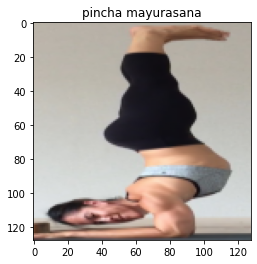

In [ ]:
plt.imshow(X[601]) #checking any random image
plt.title(labels[Y[601]])
plt.show()

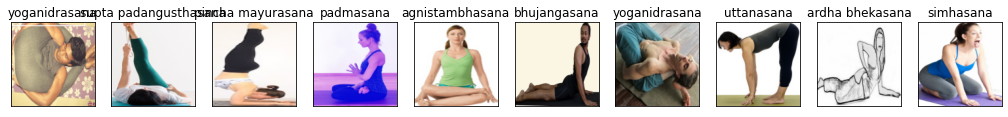

In [ ]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

<h3>Spliting the Data into the train & test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [ ]:
print('Shapes of Data Split into Train & Test Part')
print('Training Data->',X_train.shape,Y_train.shape,'Testing Data->',X_test.shape,Y_test.shape)

Shapes of Data Split into Train & Test Part
Training Data-> (4795, 128, 128, 3) (4795,) Testing Data-> (1199, 128, 128, 3) (1199,)


In [ ]:
# OneHot-Encoding
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [ ]:
Y_train.shape,Y_test.shape

((4795, 107), (1199, 107))

<h3>Building the CNN Model

In [ ]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1) #training the model

Epoch 1/50
120/120 [==============================] - 17s 47ms/step - loss: 4.6523 - accuracy: 0.0159 - val_loss: 4.5648 - val_accuracy: 0.0250
Epoch 2/50
120/120 [==============================] - 4s 37ms/step - loss: 4.5360 - accuracy: 0.0279 - val_loss: 4.5220 - val_accuracy: 0.0386
Epoch 3/50
120/120 [==============================] - 4s 37ms/step - loss: 4.4059 - accuracy: 0.0532 - val_loss: 4.4157 - val_accuracy: 0.0428
Epoch 4/50
120/120 [==============================] - 5s 39ms/step - loss: 3.9507 - accuracy: 0.1241 - val_loss: 3.9119 - val_accuracy: 0.1439
Epoch 5/50
120/120 [==============================] - 4s 37ms/step - loss: 3.1524 - accuracy: 0.2617 - val_loss: 3.6295 - val_accuracy: 0.1960
Epoch 6/50
120/120 [==============================] - 4s 37ms/step - loss: 2.3276 - accuracy: 0.4314 - val_loss: 3.5965 - val_accuracy: 0.2398
Epoch 7/50
120/120 [==============================] - 5s 39ms/step - loss: 1.6052 - accuracy: 0.5871 - val_loss: 4.1559 - val_accuracy: 0.258

Text(0.5, 1.0, 'Loss evolution')

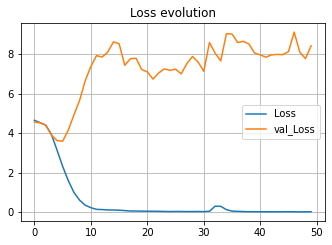

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

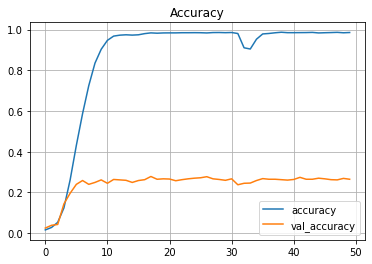

In [ ]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

<h3>Saving the Model

In [ ]:
model.save('./Yoga_CNN.h5')

<h3> Evaluating the Model

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=1)

38/38 [==============================] - 1s 19ms/step - loss: 8.4458 - accuracy: 0.2577


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([ 41,  24,  98, ...,  66, 101,  16])

In [ ]:
Y_test=np.argmax(Y_test,axis=1)
Y_test

array([98, 66, 28, ..., 55,  7, 91])

In [ ]:
#Printing Confusion Matrix

from sklearn import metrics
metrics.confusion_matrix(Y_test,y_pred)

array([[6, 0, 1, ..., 0, 0, 0],
       [0, 4, 1, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 5, 0],
       [0, 1, 0, ..., 0, 0, 3]])

In [ ]:
#Printing Classification Report

metrics.classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.55      0.43      0.48        14\n           1       0.36      0.36      0.36        11\n           2       0.40      0.44      0.42         9\n           3       0.60      0.33      0.43         9\n           4       0.20      0.15      0.17        13\n           5       0.00      0.00      0.00         3\n           6       0.20      0.25      0.22        12\n           7       0.11      0.09      0.10        11\n           8       0.12      0.14      0.13         7\n           9       0.60      0.43      0.50        14\n          10       0.12      0.08      0.10        12\n          11       0.00      0.00      0.00         7\n          12       0.20      0.20      0.20        15\n          13       0.00      0.00      0.00         8\n          14       0.00      0.00      0.00        12\n          15       0.00      0.00      0.00         9\n          16       0.00      0.00      0.00        10\n       

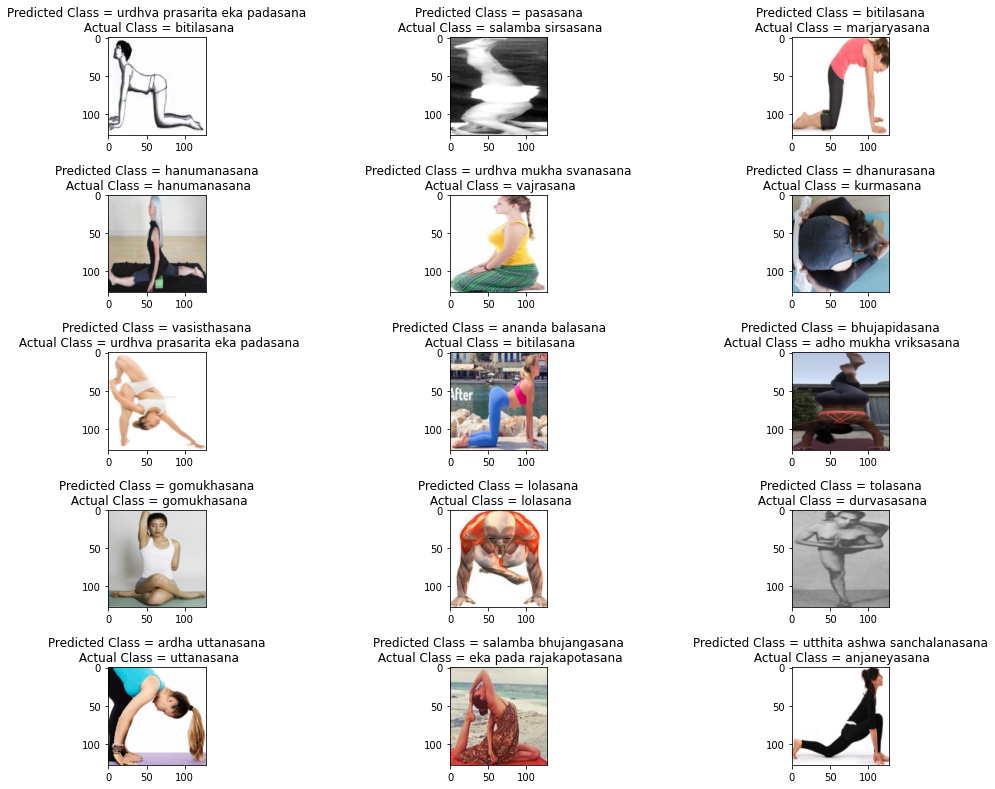

In [ ]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=2.5)